In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from ieeg.auth import Session
from scipy import signal as sig
import scipy as sc
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF,ConstantKernel
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
import os
from os.path import join as ospj
from os.path import exists as ospe
import pathlib
from tqdm import tqdm
from utils import *
import sys
sys.path.append('/users/wojemann/iEEG_processing')
import mne

In [2]:
np.random.seed(42)

with open('config.json','r') as f:
    CONFIG = json.load(f)
usr = CONFIG["paths"]["iEEG_USR"]
pass_path = CONFIG["paths"]["iEEG_PWD"]
datapath = CONFIG["paths"]["RAW_DATA"]
ieeg_list = CONFIG["patients"]
# rid_hup = pd.read_csv(ospj(datapath,'rid_hup.csv'))
pt_list = np.unique(np.array([i.split("_")[0] for i in ieeg_list]))

In [3]:
pt = pt_list[0]
print(f"Starting Seizure Preprocessing for {pt}")
raw_datapath = ospj(datapath,pt)
seizure_times = pd.read_csv(ospj(raw_datapath,f"seizure_times_{pt}.csv"))

for i_sz,row in seizure_times.iterrows():
    if i_sz == 3:
        print(f"Seizure number: {i_sz}")
        assert(os.path.exists(ospj(raw_datapath,"seizures",f"seizure_{i_sz}_stim_{row.stim}.pkl")))
        seizure = pd.read_pickle(ospj(raw_datapath,"seizures",f"seizure_{i_sz}_stim_{row.stim}.pkl"))
        fs = seizure.pop('fs').to_numpy()[0]
        t = np.arange(0,len(seizure)/fs,1/fs)
        ch_names_clean = seizure.columns.to_list()
        break

Starting Seizure Preprocessing for HUP224
Seizure number: 3


In [4]:
x,y = detect_bad_channels(seizure.to_numpy(),fs)

(<Figure size 2360.16x57.6 with 1 Axes>, <AxesSubplot:xlabel='Time (s)'>)

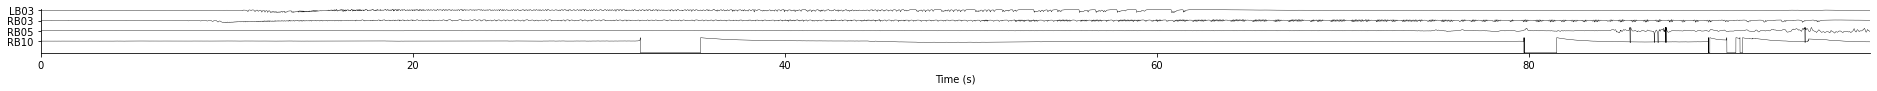

In [5]:
plot_iEEG_data(seizure.iloc[:,~x],t)

(<Figure size 2360.16x2548.8 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1939956780>)

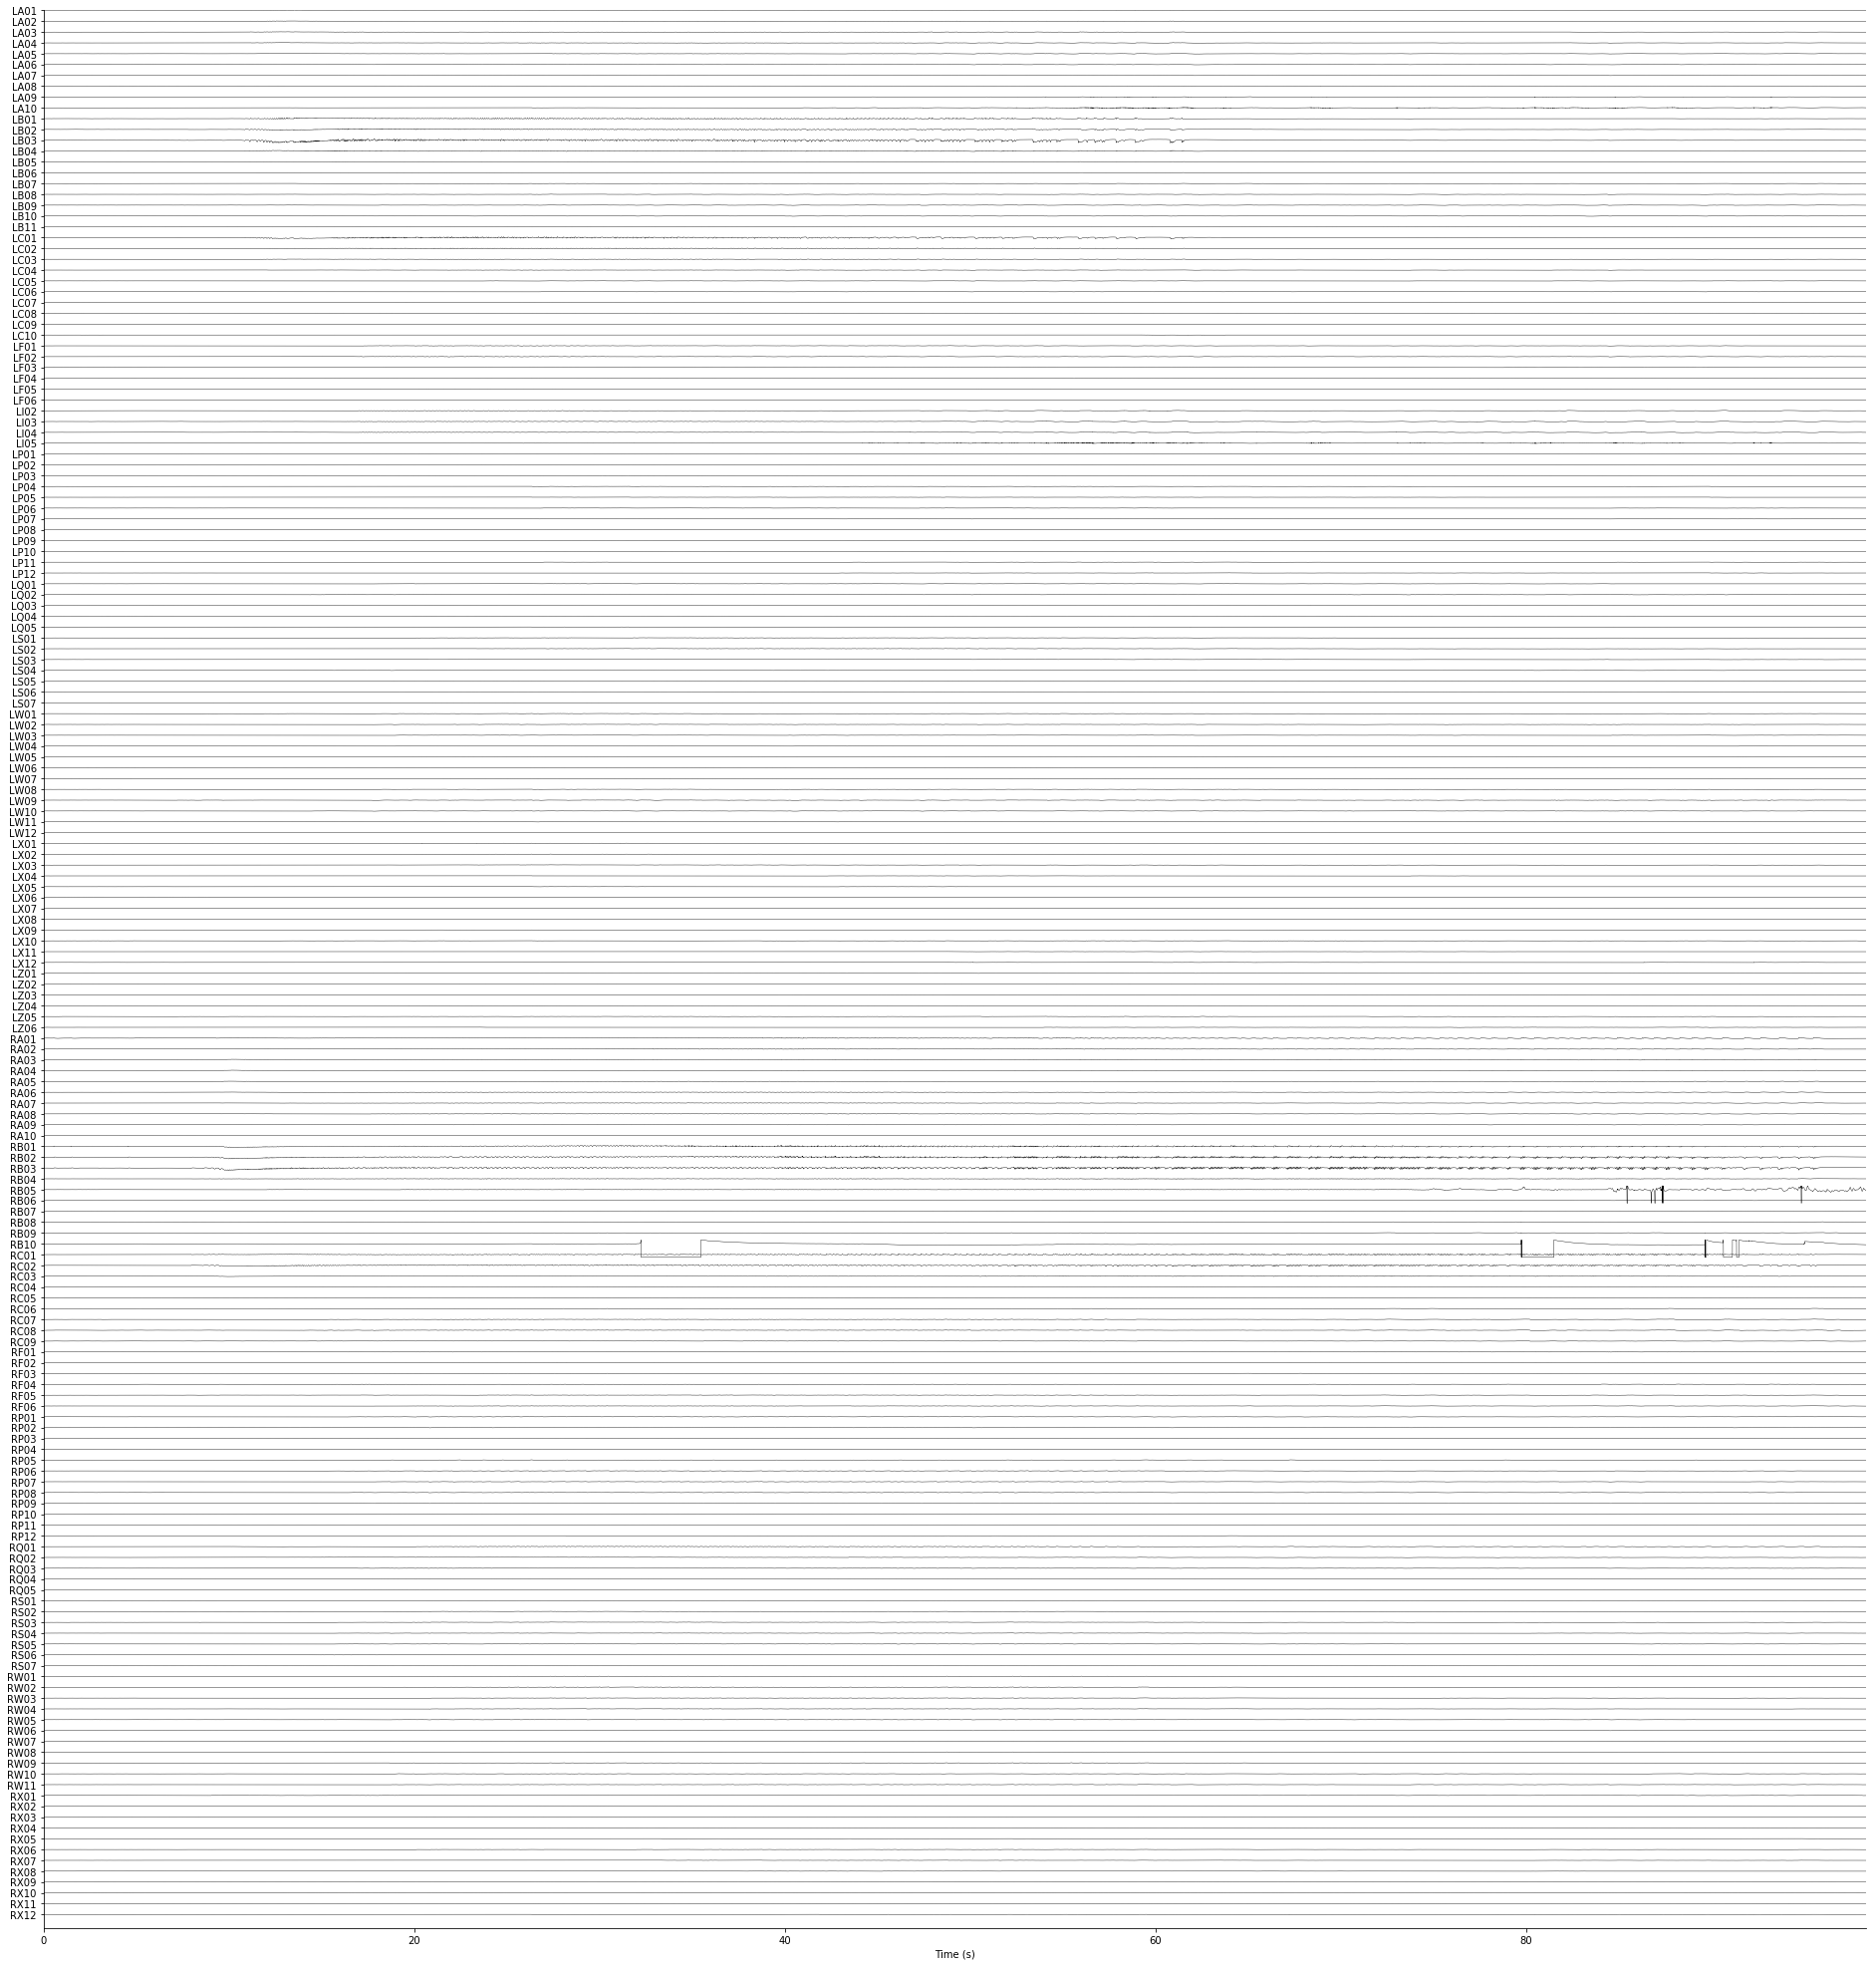

In [26]:
plot_iEEG_data(seizure,t)

In [15]:
seizure.head()

,LA01,LA02,LA03,LA04,LA05,LA06,LA07,LA08,LA09,LA10,...,RX03,RX04,RX05,RX06,RX07,RX08,RX09,RX10,RX11,RX12
0,64.534692,77.319941,87.038243,92.874524,94.290668,88.170435,70.862335,44.807119,22.343546,18.885833,...,-47.601848,-33.873010,-30.134330,-34.004839,-38.036043,-36.469671,-29.853728,-23.325665,-20.969497,-22.400579
1,63.437727,75.935176,85.509654,91.404301,93.100394,87.510868,70.917171,45.469812,23.107264,19.090429,...,-55.821359,-40.822097,-35.732347,-38.580739,-41.878157,-39.693882,-32.530517,-25.629765,-23.181360,-24.746147
2,63.177853,76.286431,86.527089,93.052042,95.136721,89.576075,72.768216,47.106909,24.641808,20.542911,...,-64.653480,-48.263604,-42.186364,-44.820085,-48.206368,-45.695182,-37.584816,-29.602094,-26.529812,-27.981207
3,65.348880,76.868510,86.329917,93.031920,95.737975,90.618974,73.791183,47.743032,24.780702,20.307457,...,-76.176093,-58.183166,-50.648900,-52.540705,-55.836057,-53.405100,-45.030215,-36.235534,-31.955691,-32.048432
4,66.960483,79.680760,90.112724,97.421489,100.319602,94.978444,77.611252,50.928559,27.502451,22.938452,...,-87.547048,-68.406681,-59.322112,-59.963484,-62.624957,-60.016580,-51.464009,-42.097575,-36.756611,-35.478794
